# Lesson 6. Asking Spatial Questions

- Measurement queries
    - Compare total area of counties with ALAND+AWATER values from census data
    - Compute length (perimeter)
- Relationship queries
    - What alameda county schools are in Berkeley?
- Proximity relationships (what’s near me?) aka making a buffer
    - What schools are near bart stations (or bike blvds) 
- PRACTICE


In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 6.1 Measurement Queries

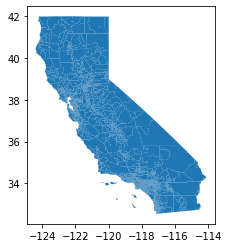

In [6]:
census_tracts = gpd.read_file("zip://notebook_data/census/Tracts/cb_2013_06_tract_500k.zip")
census_tracts.plot()

In [7]:
census_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,001,400300,1400000US06001400300,06001400300,4003,CT,1105329,0,"POLYGON ((-122.26416 37.84000, -122.26186 37.8..."
1,06,001,400900,1400000US06001400900,06001400900,4009,CT,420877,0,"POLYGON ((-122.28558 37.83978, -122.28319 37.8..."
2,06,001,402200,1400000US06001402200,06001402200,4022,CT,712082,0,"POLYGON ((-122.30403 37.80739, -122.30239 37.8..."
3,06,001,402800,1400000US06001402800,06001402800,4028,CT,398311,0,"POLYGON ((-122.27598 37.80622, -122.27335 37.8..."
4,06,001,404800,1400000US06001404800,06001404800,4048,CT,628405,0,"POLYGON ((-122.21825 37.80086, -122.21582 37.8..."


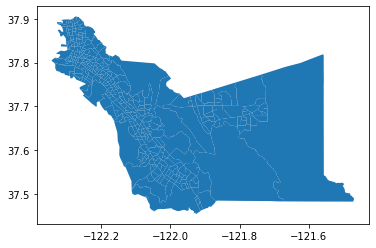

In [8]:
census_tracts_ac = census_tracts.loc[census_tracts['COUNTYFP']=='001']
census_tracts_ac.plot()

In [11]:
census_tracts_ac.area

<ipython-input-11-e8c4d6d3ea03>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  census_tracts_ac.area


0       0.000113
1       0.000045
2       0.000071
3       0.000041
4       0.000063
          ...   
7826    0.000098
7827    0.002275
7850    0.000033
8031    0.000139
8032    0.000316
Length: 361, dtype: float64

In [12]:
census_tracts_ac.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
census_tracts_ac_utm10 = census_tracts_ac.to_crs( "epsg:26910")

In [26]:
census_tracts_ac_utm10.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 126°W to 120°W and NAD83 by country
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
census_tracts_ac_utm10.area

0       1.105797e+06
1       4.355184e+05
2       6.930523e+05
3       4.003615e+05
4       6.183936e+05
            ...     
7826    9.653980e+05
7827    2.230584e+07
7850    3.197167e+05
8031    1.355161e+06
8032    3.087534e+06
Length: 361, dtype: float64

In [23]:
census_tracts_ac_utm10.area[0]

1105796.6056938928

In [25]:
census_tracts['ALAND'][0]

1105329

In [17]:
census_tracts['ALAND'].values == census_tracts_ac_utm10.area

<ipython-input-17-504471b86cff>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  census_tracts['ALAND'].values == census_tracts_ac_utm10.area


ValueError: Lengths must match to compare

In [29]:
census_tracts_ac_utm10.area.sum()

1948917581.1122904

In [27]:
census_tracts_ac_utm10.length

0        5357.060239
1        2756.937555
2        5395.895162
3        2681.974829
4        3710.388859
            ...     
7826     4331.600289
7827    32004.773556
7850     2353.624225
8031     4718.701537
8032     8176.643793
Length: 361, dtype: float64

## 6.2 Relationship Queries


[Spatial relationship queries](https://en.wikipedia.org/wiki/Spatial_relation) consider how two geometries or sets of geometries relate to one another in space. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png" height="300px"></img>


Here is a list of the most commonly used GeoPandas methods to test spatial relationships.

- [within](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.within)
- [contains](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.contains) (the inverse of `within`)
- [intersects](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.intersects)

<br>
There several other GeoPandas spatial relationship predicates but they are more complex to properly employ. For example the following two operations only work with geometry that are completely aligned.

- [touches](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.touches)
- [equals](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.equals)


All of these methods takes the form:

    Geoseries.contains(geometry)

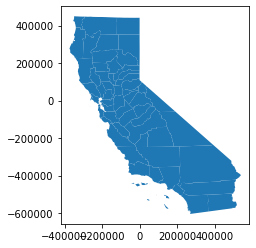

In [30]:
counties = gpd.read_file('notebook_data/california_counties/CaliforniaCounties.shp')
counties.plot()

In [31]:
counties_utm10 = counties.to_crs( "epsg:26910")

In [32]:
counties_utm10.head()

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,...,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Kern,California,839631,102.9,851089,104.282870,499766,48921,12676,...,1513.53,8161.35,06103,"San Bernardino,Tulare,Inyo",2495935,None,None,None,None,"POLYGON ((964896.794 3973797.522, 965486.696 3..."
1,0,Kings,California,152982,109.9,155039,111.427421,83027,11014,2562,...,1203.20,1391.39,06089,"Fresno,Kern,Tulare",2212260,None,None,None,None,"POLYGON ((781583.328 4033124.420, 781419.202 4..."
2,0,Lake,California,64665,48.6,65253,49.082334,52033,1232,2049,...,72.31,1329.46,06106,None,0,None,None,None,None,"MULTIPOLYGON (((519553.495 4297027.700, 519516..."
3,0,Lassen,California,34895,7.4,35039,7.422856,25532,2834,1234,...,120.92,4720.42,06086,None,0,None,None,None,None,"POLYGON ((706299.418 4562109.751, 706414.494 4..."
4,0,Los Angeles,California,9818605,2402.3,9904341,2423.264150,4936599,856874,72828,...,187.94,4087.19,06073,"San Bernardino,Kern",2874841,None,None,None,None,"MULTIPOLYGON (((951827.558 3745453.048, 951805..."


In [34]:
counties_utm10_ac = counties_utm10.loc[counties_utm10['NAME']=='Alameda']

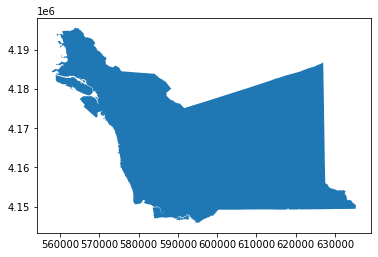

In [40]:
counties_utm10_ac.plot()

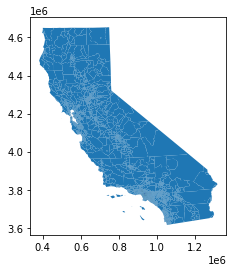

In [54]:
census_tracts_utm10.plot()

In [37]:
census_tracts_utm10 = census_tracts.to_crs( "epsg:26910")

In [53]:
census_tracts_utm10.crs == counties_utm10_ac.crs

True

In [77]:
tracts_within_ac = census_tracts_utm10.within(counties_utm10_ac.geometry.squeeze())

In [78]:
sum(tracts_within_ac)

307

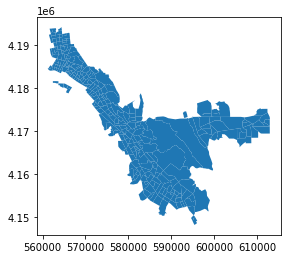

In [79]:
census_tracts_utm10[tracts_within_ac].plot()

In [72]:
tracts_int_ac= census_tracts_utm10.intersects(counties_utm10_ac.geometry.squeeze())

In [73]:
sum(tracts_int_ac)

390

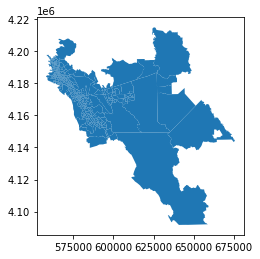

In [75]:
census_tracts_utm10[tracts_int_ac].plot()

## Exercise(?)
What alameda county schools are in Berkeley?

In [84]:
berkeley_places = gpd.read_file("outdata/berkeley_places.shp")
berkeley_places_utm10 = berkeley_places.to_crs("epsg:26910")

In [80]:
schools_df = pd.read_csv('notebook_data/alco_schools.csv')
schools_df.head()

,X,Y,Site,Address,City,State,Type,API,Org
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public


In [81]:
schools_gdf = gpd.GeoDataFrame(schools_df, 
                               geometry=gpd.points_from_xy(schools_df.X, schools_df.Y))
schools_gdf.crs = "epsg:4326"

In [82]:
schools_gdf_utm10 = schools_gdf.to_crs( "epsg:26910")

In [89]:
schools_within_berkeley = schools_gdf_utm10.within(berkeley_places_utm10.geometry.squeeze())

In [90]:
schools_within_berkeley

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Length: 550, dtype: bool

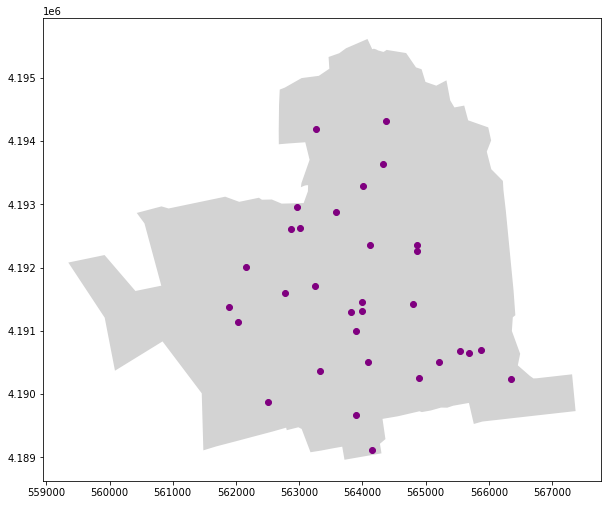

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(color='lightgrey', ax=ax)
schools_gdf_utm10[schools_within_berkeley].plot(color='purple',ax=ax)

## 6.3 Proximity Relationships

Proximity relationships (what’s near me?) aka making a buffer

What schools are near bike blvds?

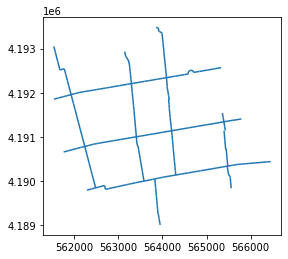

In [93]:
bike_blvds = gpd.read_file('notebook_data/transportation/BerkeleyBikeBlvds.geojson')
bike_blvds.plot()

In [94]:
bike_blvds_utm10 = bike_blvds.to_crs( "epsg:26910")

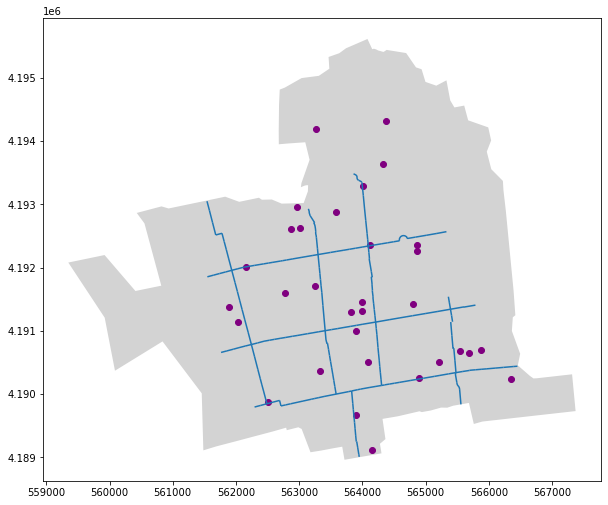

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(color='lightgrey', ax=ax)
schools_gdf_utm10[schools_within_berkeley].plot(color='purple',ax=ax)
bike_blvds_utm10.plot(ax=ax)

In [105]:
bike_blvds_buf = bike_blvds_utm10.buffer(distance=500)

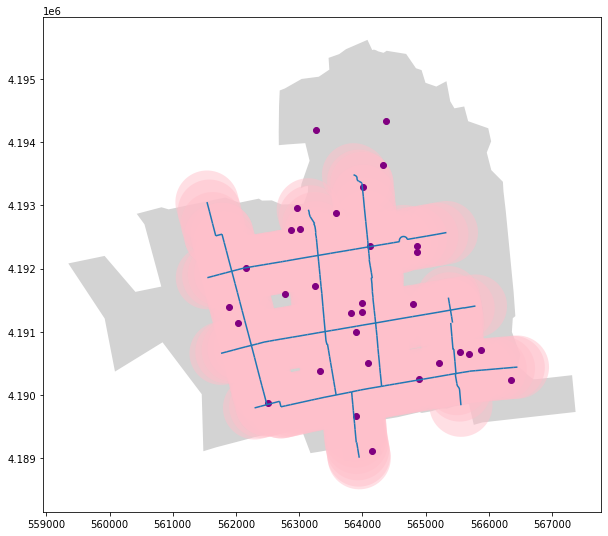

In [106]:
fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(color='lightgrey', ax=ax)
bike_blvds_buf.plot(color='pink',ax=ax,alpha=.5)
schools_gdf_utm10[schools_within_berkeley].plot(color='purple',ax=ax)
bike_blvds_utm10.plot(ax=ax)

## 6.4 Exercise

What schools are near BART stations?

In [113]:
bart_stations = gpd.read_file('notebook_data/transportation/bart.csv')
bart_stations_gdf = gpd.GeoDataFrame(bart_stations, 
                               geometry=gpd.points_from_xy(bart_stations.lon, bart_stations.lat))
bart_stations_gdf.crs = "epsg:4326"

bart_stations_gdf_utm10 = bart_stations_gdf.to_crs( "epsg:26910")

In [114]:
bart_stations_utm10 = bart_stations.to_crs( "epsg:26910")

In [116]:
bart_buf = bart_stations_utm10.buffer(distance=500)

(4188960.932425667, 4195616.510453224)

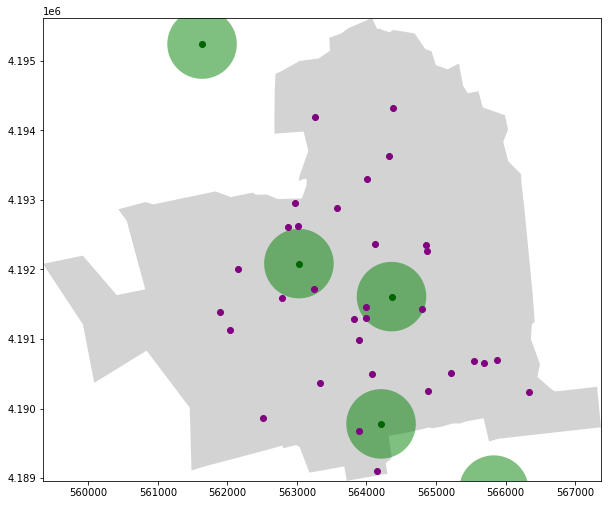

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(color='lightgrey', ax=ax)
bart_buf.plot(color='green',ax=ax,alpha=.5)
schools_gdf_utm10[schools_within_berkeley].plot(color='purple',ax=ax)
bart_stations_utm10.plot(color='darkgreen',ax=ax)

minx, miny, maxx, maxy = berkeley_places_utm10.total_bounds
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="../assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        


